## Los Angeles Income Profile

The purpose of this profile is to explore income census data for the City of Los Angeles. Specifically, I am interested in exploring and visualizing income inequality throughout Los Angeles. As part of our data exploration, I will create charts and maps that will help us identify any trends or patterns. Let's jump in!

Author: Brian Ramirez

### Finding Census Data
Where do we find Census Data? Well, there's actually a few sites where we can access Census Data! These sites include: data.census.com, socialexplorer.com, and censusreport.org. Personally, I find censusreport.org aesthetically pleasing and rpretty accessible. So we will go with censusreporter! After reaching the censusreporter site, I searched for the Los Angeles, CA profile. Within the Los Angeles, CA profile, there is an Economics section which includes an Income section. Next, I clicked on "Show Data" but the data isn't exactly what I want. The data I want is median household income by census tract in the City of Los Angeles. The default includes the city, metro, county, state, and country. I removed the unwanted scales and added the census tract scale. I also changed the data table because I only want median household income and not an income breakdown. After making all these changes, our data is ready to download! To download the data, I clicked on the "Download Data" option and chose GeoJSON. On to the next step!

### Importing our Data

In [70]:
import geopandas as gpd

In [71]:
import pandas as pd

First, we HAVE TO run geopandas because we will be navigating and visualizing geographically-refernced data!

In [72]:
incometracts=gpd.read_file('data/laincometracts.geojson')

Second, the MOMENT OF TRUTH! We can finally read in our data! I used the gdp.read_file() command and referenced my data inside the parenthesis. I named our data incometracts. 
Note: Before doing this I uploaded my census data into the designated "data" folder. 

### Exploring our Data

In [73]:
incometracts.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Third, ALTHOUGH we already have a general idea of what our data includes its still important for us to run simple commands to gain a better idea of what we are dealing with. To do this, I first start by using the .head() command which outputs the first five rows of our data. The first thing that stands out when I ran the .head() command was that the columns weren't named what I wanted them to be. I didn't like the B19.. column and I didn't like the B19... error column either.

In [74]:
list(incometracts)

['geoid', 'name', 'B19013001', 'B19013001, Error', 'geometry']

Fourth, like I mentioned, I didn't like the names of the columns our data included. To list the column names again I can use the list() function. The ouput are the names of the columns. Pretty straight forward.

In [75]:
incometracts.columns = ['geoid',
 'Census_Tract',
 'Median_Household_Income',
 'Error',
 'geometry']

Fifth, to EASE the stress of the aesthetic mistake, I can use the .columns = () command which will rename the columns to whatever I put in the parenthesis. In this case, I renamed the columns to names that ACTUALLY MADE SENSE. KIDDING! I know that they make sense (they're the census table numbers), but still these look better.

In [76]:
list(incometracts)

['geoid', 'Census_Tract', 'Median_Household_Income', 'Error', 'geometry']

In [77]:
incometracts.head()

,geoid,Census_Tract,Median_Household_Income,Error,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Sixth, to make sure that the above command WORKED, I ran the list() and .head command again! And it worked! NOW WE ARE READY TO BEGIN MAKING OUR CHARTS AND MAP AND EXPLORING OUR INCOME INEQUALITY IN THE CITY OF LA!

### Making Charts with our Data

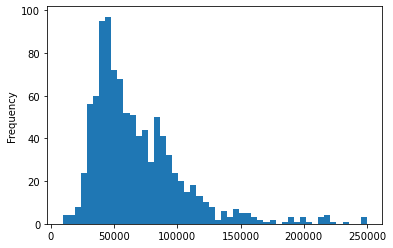

In [78]:
incometracts['Median_Household_Income'].plot.hist(bins=50)

Seventh, to explore the distribution of income in the City of Los Angeles, I created a histogram chart using the .plot.hist() command! The ouput of the command is histogram chart with median household income in the x axis and frequency as the y axis. In other words, this chart tells us how many people (frequency) have a given income category. 

### Sorting our Data

NOTE: For the next portion of this data exploration, I actually had to download and upload the csv version of our data because it would not allow me to create the charts the way I wanted them. Rather than giving up to this inconvenience I PERSERVED!!!

In [79]:
incomecsv = pd.read_csv('data/incomes.csv')
incomecsv

,geoid,name,B19013001,"B19013001, Error"
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0
...,...,...,...,...
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,NaN
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,NaN
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,NaN
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN


In [80]:
incomecsv.columns = ['geoid',
 'Census_Tract',
 'Median_Household_Income',
 'Error']

Above I simply read my data and then renamed the columns because once again they were ugly. On to the next step!

In [81]:
highestincomes = incomecsv.sort_values(by='Median_Household_Income',ascending = False)
highestincomes.head(10)

,geoid,Census_Tract,Median_Household_Income,Error
831,14000US06037262303,"Census Tract 2623.03, Los Angeles, CA",250001.0,NaN
832,14000US06037262400,"Census Tract 2624, Los Angeles, CA",250001.0,NaN
340,14000US06037141700,"Census Tract 1417, Los Angeles, CA",250001.0,NaN
994,14000US06037980019,"Census Tract 9800.19, Los Angeles, CA",231250.0,117385.0
833,14000US06037262501,"Census Tract 2625.01, Los Angeles, CA",224962.0,24985.0
839,14000US06037264000,"Census Tract 2640, Los Angeles, CA",220417.0,67305.0
338,14000US06037141500,"Census Tract 1415, Los Angeles, CA",219698.0,58903.0
827,14000US06037262100,"Census Tract 2621, Los Angeles, CA",217462.0,71136.0
838,14000US06037262802,"Census Tract 2628.02, Los Angeles, CA",217292.0,22614.0
829,14000US06037262301,"Census Tract 2623.01, Los Angeles, CA",215750.0,72729.0


In [82]:
lowestincomes = incomecsv.sort_values(by='Median_Household_Income',ascending = True)
lowestincomes.head(10)

,geoid,Census_Tract,Median_Household_Income,Error
536,14000US06037206300,"Census Tract 2063, Los Angeles, CA",9191.0,2804.0
691,14000US06037222700,"Census Tract 2227, Los Angeles, CA",9632.0,7616.0
700,14000US06037224700,"Census Tract 2247, Los Angeles, CA",11576.0,3918.0
683,14000US06037221820,"Census Tract 2218.20, Los Angeles, CA",12235.0,2899.0
820,14000US06037242600,"Census Tract 2426, Los Angeles, CA",16586.0,3141.0
684,14000US06037221900,"Census Tract 2219, Los Angeles, CA",17237.0,8026.0
817,14000US06037242100,"Census Tract 2421, Los Angeles, CA",18177.0,3825.0
544,14000US06037207502,"Census Tract 2075.02, Los Angeles, CA",18594.0,2695.0
991,14000US06037980010,"Census Tract 9800.10, Los Angeles, CA",19167.0,11351.0
850,14000US06037265305,"Census Tract 2653.05, Los Angeles, CA",20655.0,8015.0


Eighth, to learn more about income inequality in the City of Los Angeles, I sorted our data TWICE! The first sort is to sort our data from highest to lowest median household incomes by census tract. The second sort is to sort our data from lowest to highest median household incomes by census tract. We will use both of these sorts to now create two histogram charts of the census tracts with the 10 lowest and highest median household incomes.

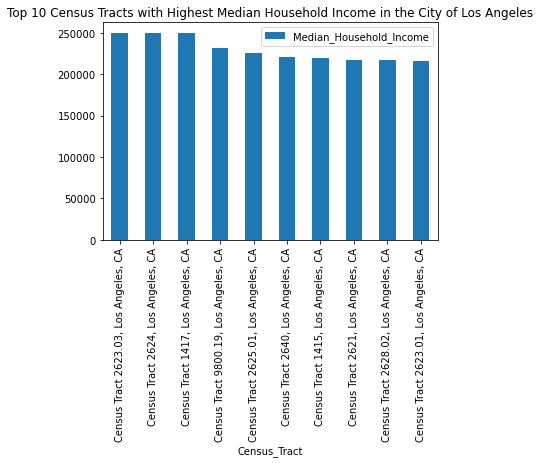

In [83]:
highestincomes.head(10).plot.bar(x='Census_Tract', 
                               y='Median_Household_Income', 
                               title='Top 10 Census Tracts with Highest Median Household Income in the City of Los Angeles')

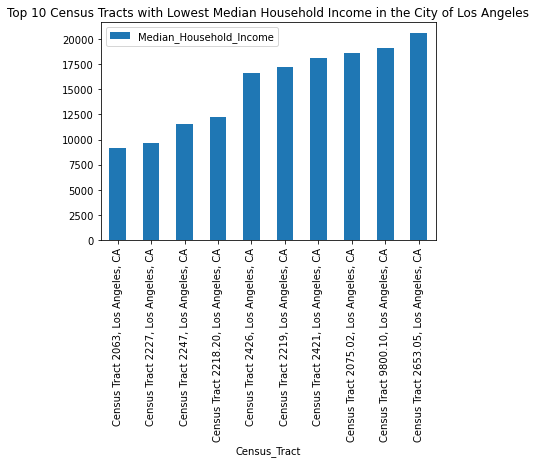

In [84]:
lowestincomes.head(10).plot.bar(x='Census_Tract', 
                               y='Median_Household_Income', 
                               title='Top 10 Census Tracts with Lowest Median Household Income in the City of Los Angeles')

Nineth, I used the .plot.bar command to both the highestincome and lowestincome data to create two income bar charts! The ouptuts are two bar charts with Census Tract as the x axis and Median Household Income as the y axis. What we can learn from these charts is that highest and lowest incomes in the City of Los Angeles are very far apart. To start, the census tract with the lowest median household income has an annual median household income less than 10,000. The census tract with the highest median household income has an annual median household income of about than 250,000. THAT'S INSANE!!! $240,000 DIFFERENCE???? INCOME INEQUALITY!!!

### Making Maps with our data

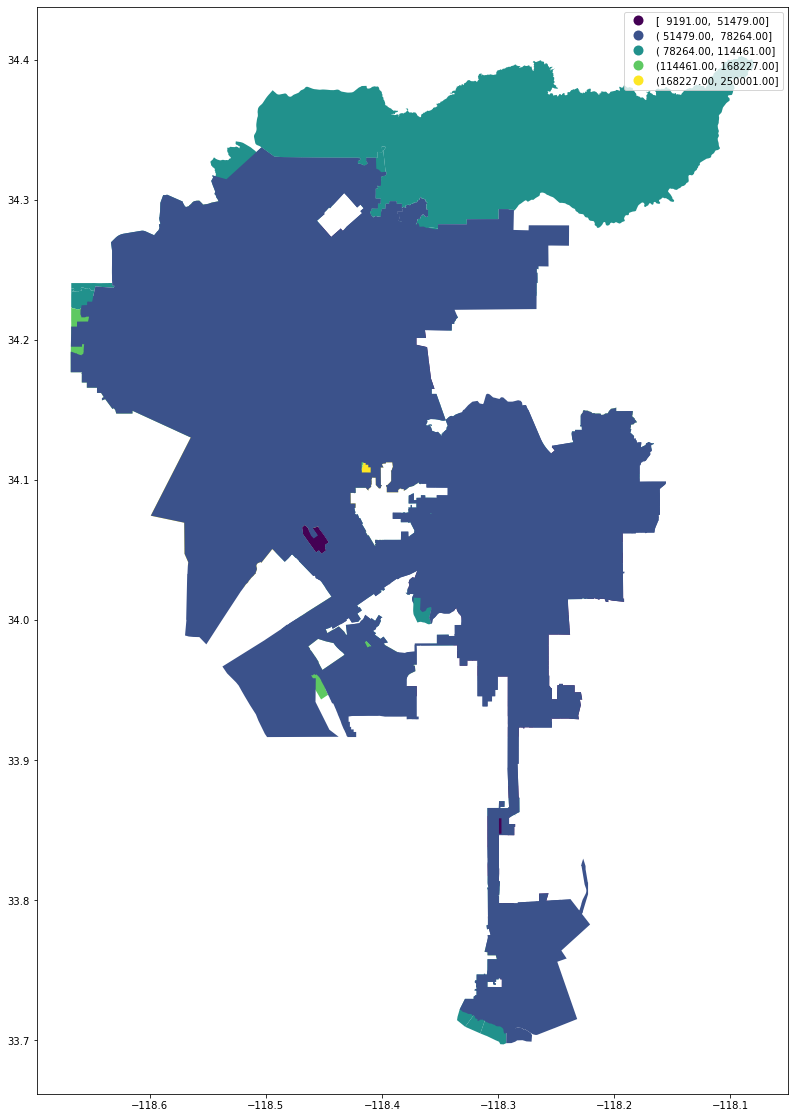

In [100]:
incometracts.plot(figsize=(20,20),
                 column='Median_Household_Income',
                 legend=True, 
                 scheme='NaturalBreaks')

Tenth, we might wonder "WHERE ARE THESE RICH PEOPLE LIVING IN LA?" Well thankfully we can use maps to find out. I used the .plot() command to map the geoJSON data I was using earlier! I wanted to make the map really big so I specified 20,20 as the figsize. I chose Median_Household_Income to make the map show income by census tract. I wanted a legend so I chose true. For the scheme, I wanted one that would really express the income inequality present in the City of Los Angeles so I went with NaturalBreaks. NaturalBreaks allowed for me to visually express great differences between the lowest and highest incomes tracts. What did we learn from the output? That there is certainly income inequality in the City of Los Angeles. Specifically, that a majority of households live with an income from ~52,000 to ~78,000. This population is spread out around the city. Where are a concentration of the wealthy people? In that small yellow census tract which happens to be located right next to Beverly Hills. No suprise.

## Conclusion

Before anything we must consider the limitations of the error associated with each row of data and the ineffective scheme of the map. The error number basically lets you know the accuracy of each median household income. This isn't considered in map or any of my earlier data exploration exercises. Aside from these limitations, this data exploration allowes us to create a profile on income in the City of Los Angeles. Specifically, that there are a lot of people that earn little and few people that earn A LOT. By creating charts and maps on income, we are able to visualize this unfortunate reality and begin to make efforts at addressing socio-economic inequities in our communities.